In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install --upgrade matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [3]:
# 1. Data Exploration
# Load the dataset
data = pd.read_csv('Processed_Flipdata.csv')
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
# Drop unnecessary columns and clean data
data.drop(columns=['Unnamed: 0'], inplace=True)
data['Prize'] = data['Prize'].str.replace(',', '').astype(float)
data['Rear Camera'] = data['Rear Camera'].str.extract(r'(\d+)').astype(float)
data['Front Camera'] = data['Front Camera'].str.extract(r'(\d+)').astype(float)

In [5]:
data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128,8,5000,50.0,16.0,0,16.64,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8.0,5.0,0,16.56,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128,8,5000,50.0,5.0,1,16.76,G37,8999.0


In [6]:
# Check for missing values and basic info
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    float64
 6   Front Camera   541 non-null    float64
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 46.6+ KB
None
           Memory         RAM     Battery_  Rear Camera  Front Camera  \
count  541.000000  541.000000   541.000000   541.000000    541.000000   
mean   110.550832    5.397412  4871.587800    46.110906     11.992606   
std     60.600694    1.984923   780.

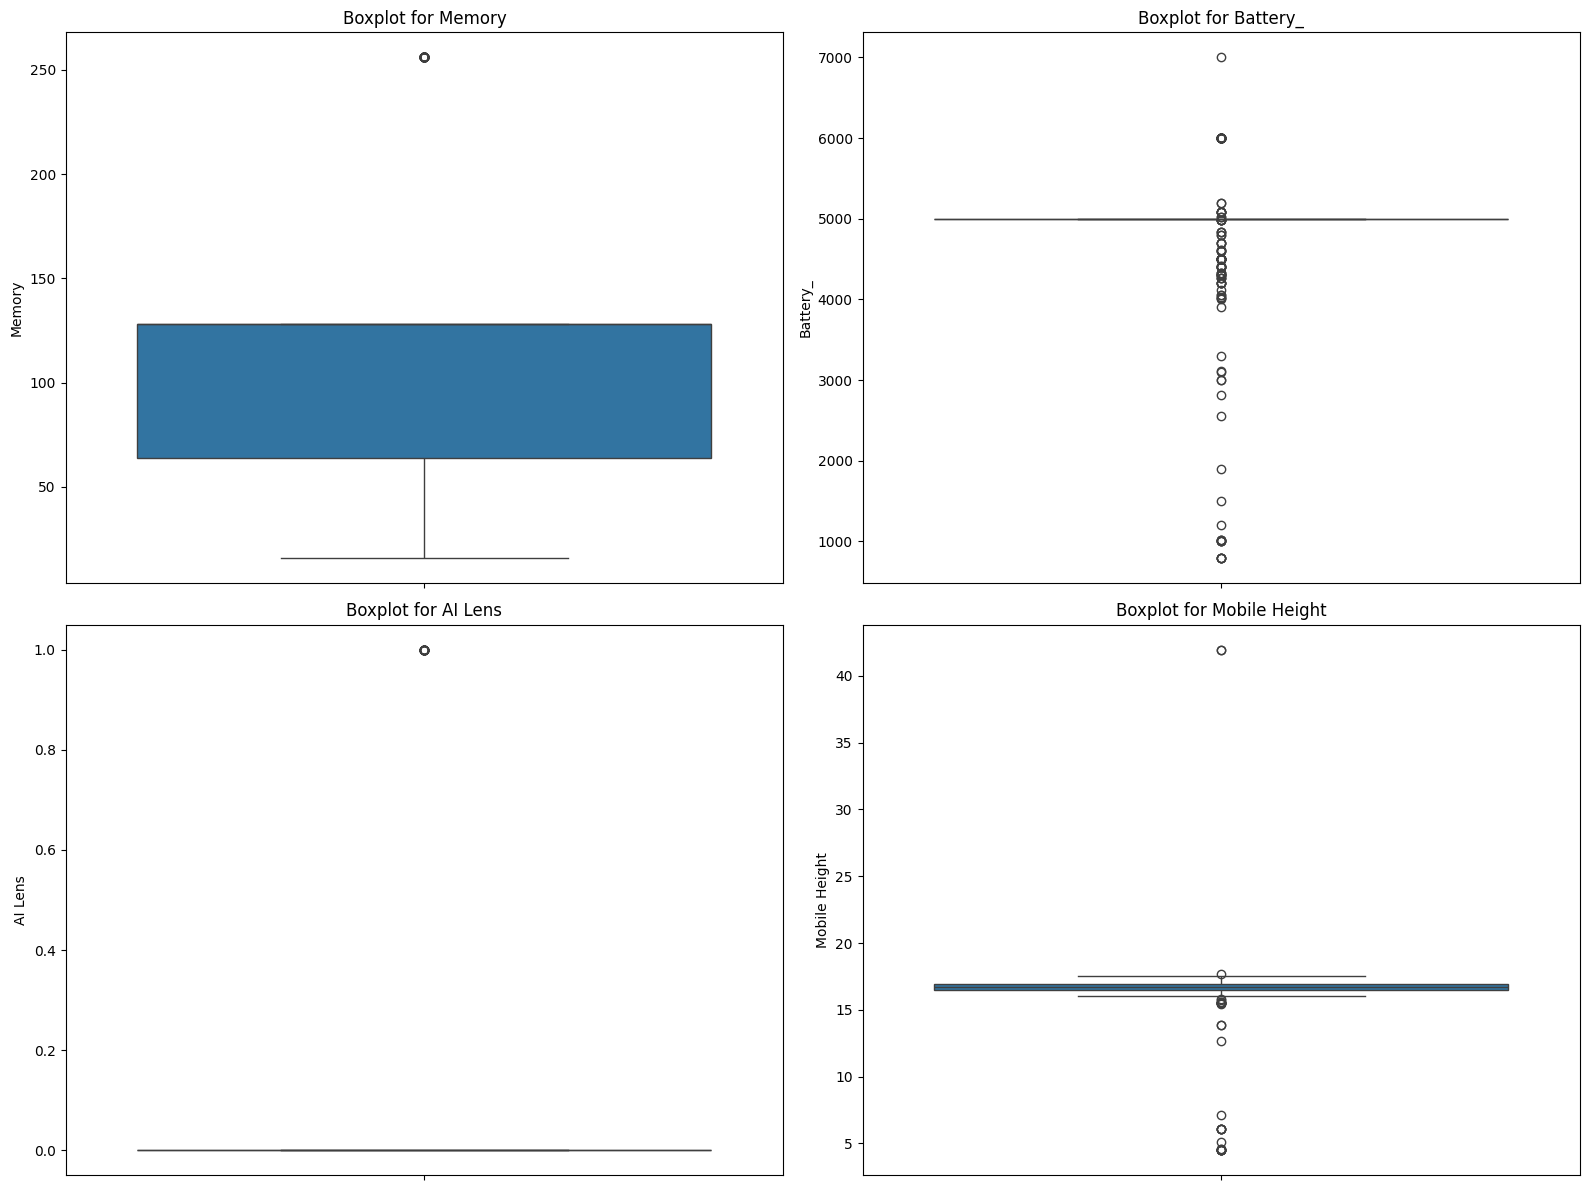

In [7]:
# Visualize outliers using boxplots for the affected columns
outlier_columns = ['Memory', 'Battery_', 'AI Lens', 'Mobile Height']

plt.figure(figsize=(16, 12))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

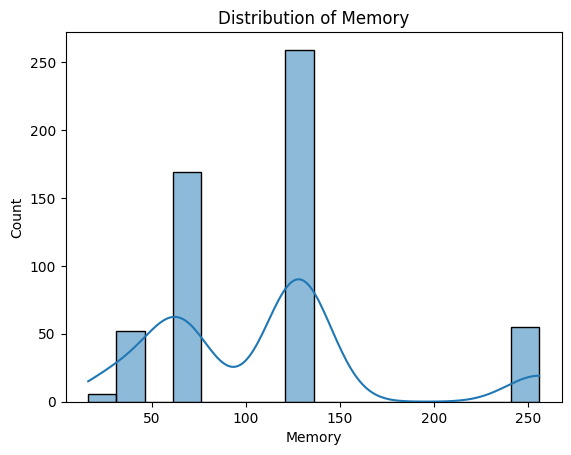

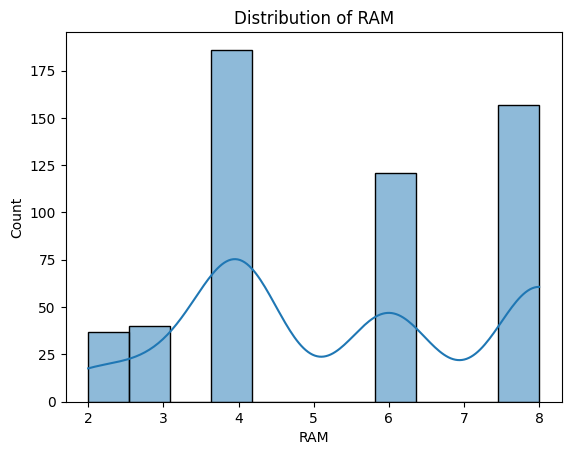

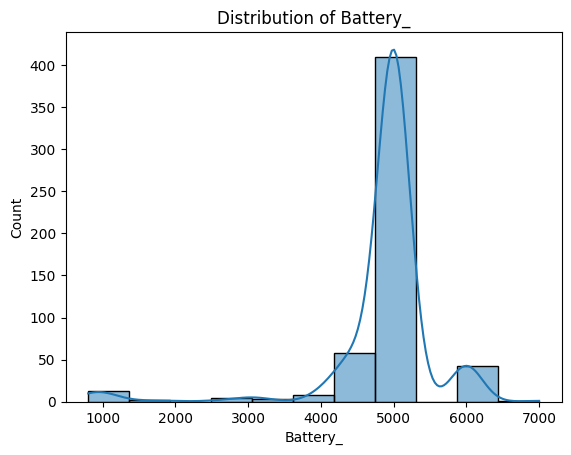

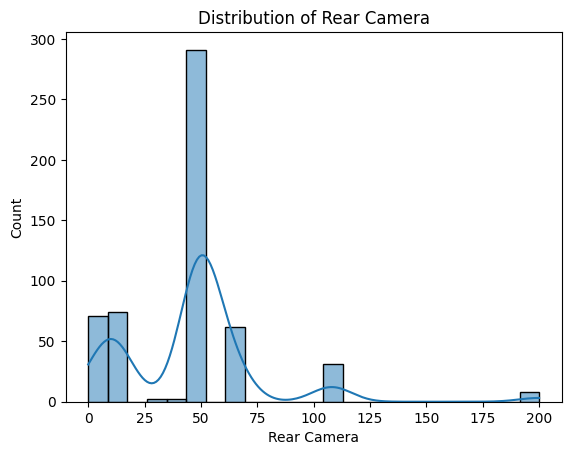

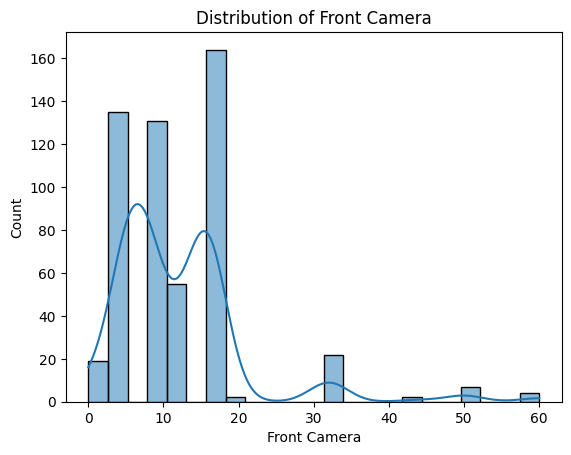

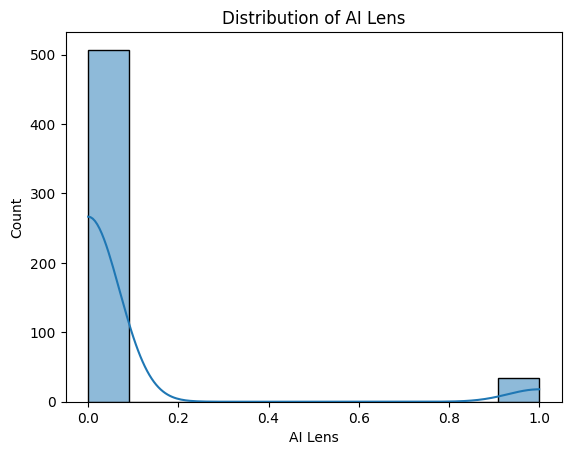

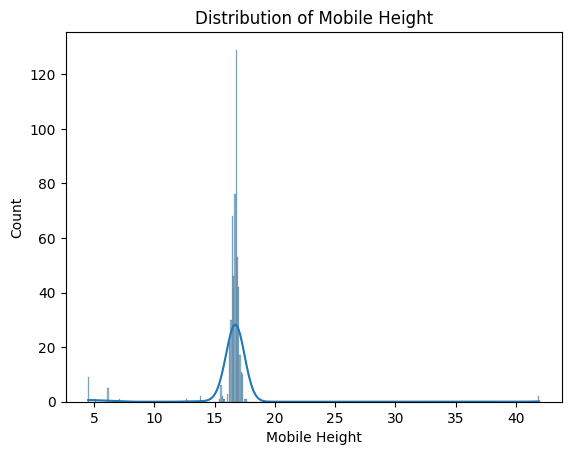

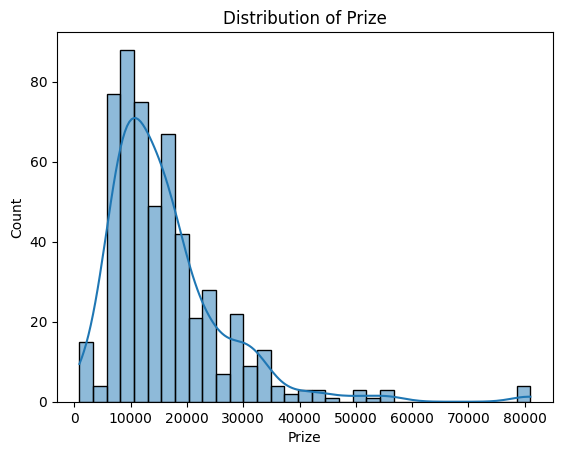

In [8]:
# Visualize distributions
numerical_columns = ['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Prize']
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

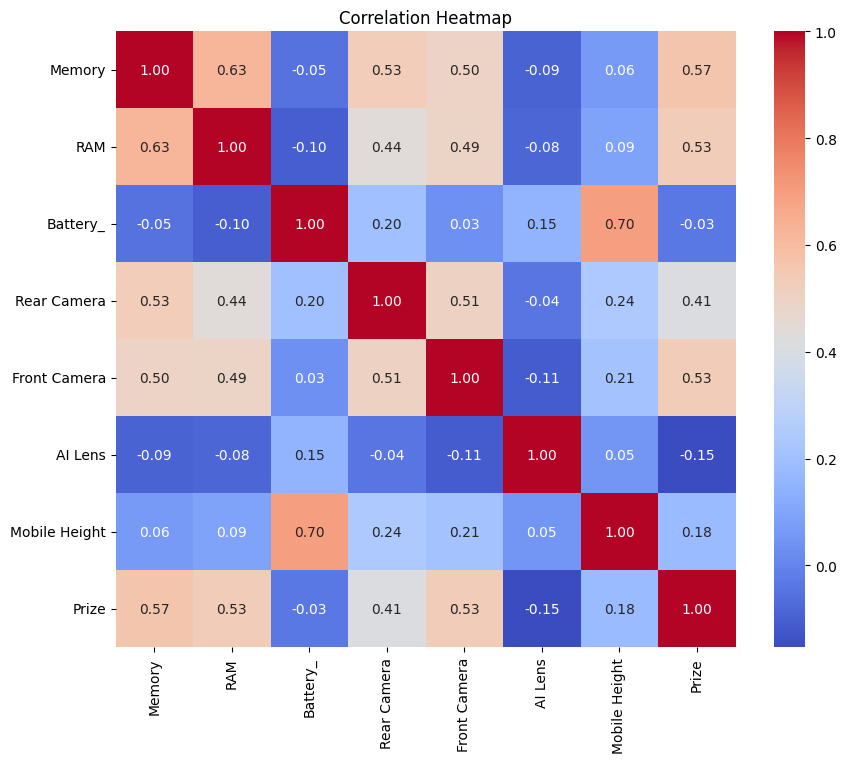

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features using Label Encoding
label_encoder = LabelEncoder()
data['Model'] = label_encoder.fit_transform(data['Model'])
data['Colour'] = label_encoder.fit_transform(data['Colour'])
data['Processor_'] = label_encoder.fit_transform(data['Processor_'])


In [11]:
# 2. Data Preprocessing
# Encode categorical features
label_encoder = LabelEncoder()
data['Colour'] = label_encoder.fit_transform(data['Colour'])
data['Processor_'] = label_encoder.fit_transform(data['Processor_'])

# Split data into features and target
X = data.drop(columns=['Prize'])
y = data['Prize']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# 3. Feature Selection
# Mutual Information
mutual_info = mutual_info_regression(X_scaled, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mutual_info_series)

Mutual Information Scores:
Processor_       1.110676
Model            1.072175
Front Camera     0.847023
Rear Camera      0.731608
Memory           0.706517
RAM              0.685665
Mobile Height    0.670472
Battery_         0.463982
Colour           0.098475
AI Lens          0.090516
dtype: float64


In [13]:
# Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, y)
print("RFE Selected Features:")
print(X.columns[rfe.support_])

RFE Selected Features:
Index(['Model', 'Memory', 'RAM', 'Front Camera', 'AI Lens'], dtype='object')


In [14]:
# PCA for dimensionality reduction
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)


In [15]:
# 4. Model Building
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Lasso Regression': Lasso()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}\n")

Linear Regression:
MAE: 4282.964295504015
RMSE: 9276.229978231846
R2 Score: 0.3756814928358704

Decision Tree:
MAE: 1842.7614678899083
RMSE: 5665.579029008858
R2 Score: 0.7671094864290924

Random Forest:
MAE: 1891.0615137614677
RMSE: 5275.277764925918
R2 Score: 0.7980918457358517

Lasso Regression:
MAE: 4281.944243221581
RMSE: 9275.025115866292
R2 Score: 0.3758436641109416



In [ ]:
# 5. Model Evaluation
# Example: Hyperparameter tuning for Random Forest
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s


In [ ]:
# Evaluate best model
y_pred = grid_search.best_estimator_.predict(X_test)
print("Random Forest with Grid Search:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


In [ ]:
# 6. Feature Importance Analysis
feature_importance = grid_search.best_estimator_.feature_importances_
importance_series = pd.Series(feature_importance, index=X.columns).sort_values(ascending=False)


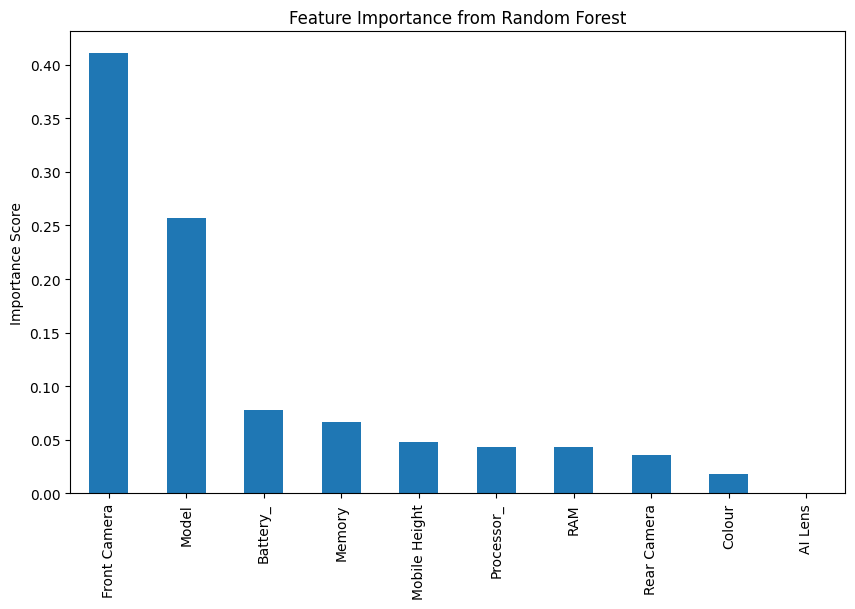

In [48]:
# Visualize feature importance
importance_series.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.show()

In [46]:
# 7. Recommendations
print("Key Recommendations:")
print("1. Focus on Memory, RAM, and Rear Camera as they have the strongest influence on price.")
print("2. Use these insights for pricing strategies and feature prioritization.")


Key Recommendations:
1. Focus on Memory, RAM, and Rear Camera as they have the strongest influence on price.
2. Use these insights for pricing strategies and feature prioritization.
